# Variational Autoencoder

In [1]:
from vae import *
import sys
sys.path.append('../autodata')
import autodata
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 190.6214 - val_loss: 172.3748
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 170.4034 - val_loss: 168.2583
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 166.9065 - val_loss: 165.8483
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: 164.7821 - val_loss: 164.1148
Epoch 5/50
60000/60000 [==============================] - 5s 86us/step - loss: 163.2234 - val_loss: 162.7270
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 161.8762 - val_loss: 161.4931
Epoch 7/50
60000/60000 [==============================] - 5s 85us/step - loss: 160.6823 - val_loss: 160.5105
Epoch 8/50
60000/60000 [==============================] - 5s 84us/step - loss: 159.5878 - val_loss: 159.4539
Epoch 9/50
60000/60000 [==============================] - 5s 84us/step - loss:

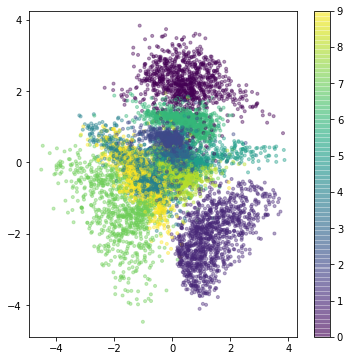

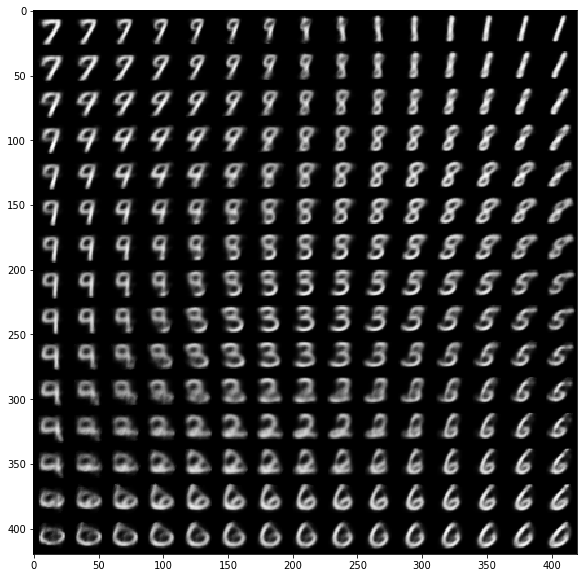

In [5]:
from keras.datasets import mnist

original_dim=784
batch_size=100
epochs=50

vae, decoder, encoder = VAE(original_dim)

# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, original_dim) / 255.
x_test = x_test.reshape(-1, original_dim) / 255.

vae.fit(x_train,
        x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

# display a 2D plot of the digit classes in the latent space
z_test = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test,
            alpha=.4, s=3**2, cmap='viridis')
plt.colorbar()
plt.show()

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28

# linearly spaced coordinates on the unit square were transformed
# through the inverse CDF (ppf) of the Gaussian to produce values
# of the latent variables z, since the prior of the latent space
# is Gaussian
u_grid = np.dstack(np.meshgrid(np.linspace(0.05, 0.95, n),
                               np.linspace(0.05, 0.95, n)))
z_grid = norm.ppf(u_grid)
x_decoded = decoder.predict(z_grid.reshape(n*n, 2))
x_decoded = x_decoded.reshape(n, n, digit_size, digit_size)

plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_decoded))), cmap='gray')
plt.show()